<a href="https://colab.research.google.com/github/ranubansal/DSML-Projects/blob/main/LoanTop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LoanTap

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : LoanTap assigned loan grade
6. sub_grade : LoanTap assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/MyDrive/logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


**Observation of data**

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

Their are both Numerical and categorial data, but some categorial data need further attention.

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
(df.isnull().sum()/df.shape[0])*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [ ]:
df['ecl_year']= df['earliest_cr_line'].str.split('-').str[-1]
df['ecl_year']=pd.to_numeric(df['ecl_year'])

In [ ]:
df['pin_code']= df['address'].str.split(' ').str[-1]
df['pin_code']= pd.to_numeric(df['pin_code'] )

In [ ]:
df['issue_d_year']= df['issue_d'].str.split('-').str[-1]
df['issue_d_year']= pd.to_numeric(df['issue_d_year'])

Dropping the column after required data extraction

In [ ]:
df= df.drop(columns= ['earliest_cr_line', 'address', 'issue_d'])

Conversion of Categorial data in 'Category' data type fron object data type

In [ ]:
column= ['term', 'ecl_year', 'grade', 'emp_title', 'title','sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'pin_code']
for i in column:
  df[i]= df[i].astype('category')

In [ ]:
print(f"{column}:{'_'*(30-len(column))}{df[column].nunique()}")

['term', 'ecl_year', 'grade', 'emp_title', 'title', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'pin_code']:________________term                        2
ecl_year                   65
grade                       7
emp_title              173105
title                   48817
sub_grade                  35
emp_length                 11
home_ownership              6
verification_status         3
loan_status                 2
purpose                    14
initial_list_status         2
application_type            3
pin_code                   10
dtype: int64


It is apparent that the 'employee title' and 'title' columns do not follow a pattern. The sheer volume of unique values, ranging in the hundreds of thousands suggests a lack of structured categorization. As a result, these columns will be excluded from subsequent analysis due to their limited potential for meaningful insights.

In [ ]:
df= df.drop(columns=['emp_title', 'title'], axis=1)

**Univariate Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

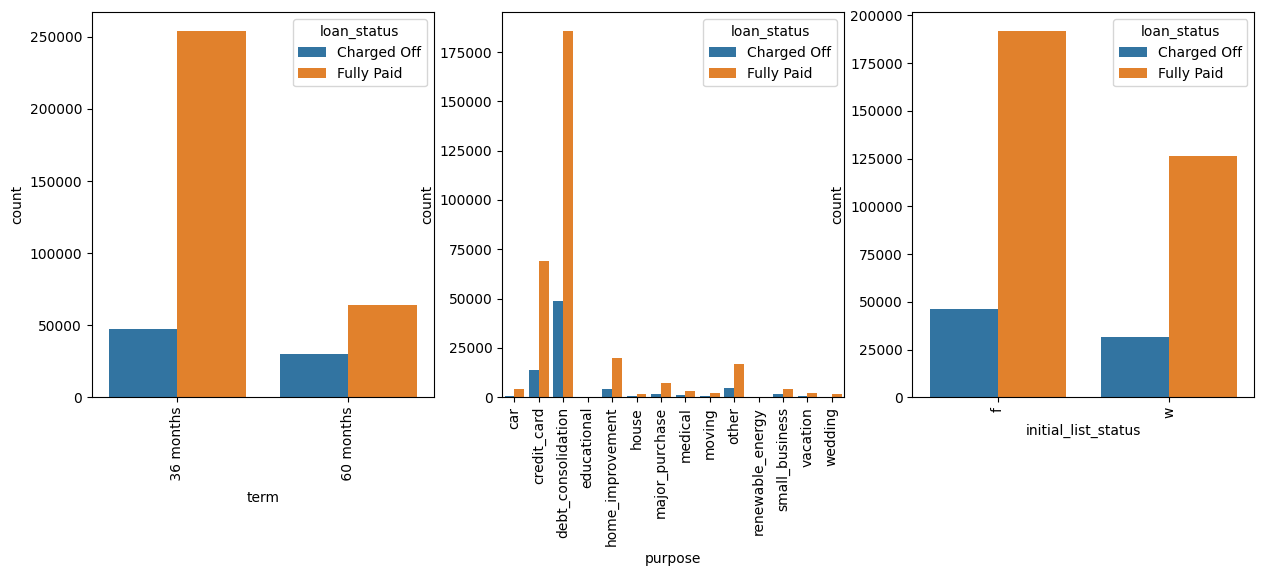

In [ ]:
plt.figure(figsize=(15,5))
x_col= ['term', 'purpose', 'initial_list_status']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.countplot(data=df, x= x_col[i], hue= 'loan_status')
  plt.xticks(rotation=90)


**Figure 1**
* It can be observed that there are higher number of applicants for shorter loan tenure (i.e. 36 months).
* It can also be observed that the ratio of 'Loan Repayment' to 'Charge Off' is much higher for loans taken for shorter duration (i.e. 36 months) than loans taken for longer duration (i.e. 60 months). Applicants are more likely to repay the loan for '36 months' tenure.

**Figure 2**
* It can be observed that the loans are majorly taken for the purpose of
'debt_consolidation' and 'credit_card' spends.
* It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for both the above mentioned purposes.

**Figure 3**
* It can be observed that the number of applicants for 'Fractional (f)' loan is higher than the applicants for 'Whole (w)' Loan.
* It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for both the above mentioned initial list status.

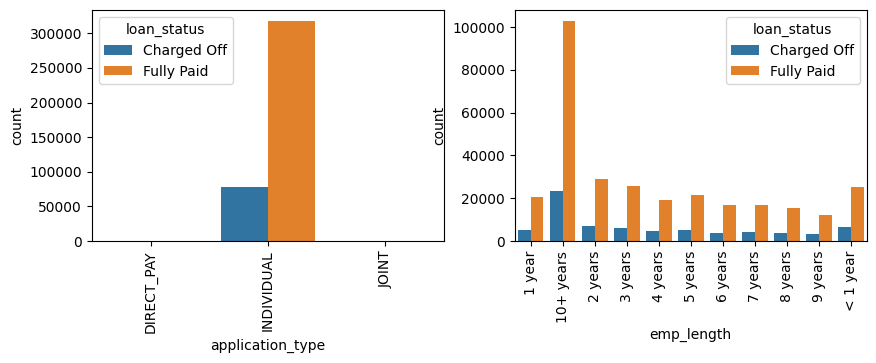

In [ ]:
plt.figure(figsize=(10,3))
x_col= ['application_type', 'emp_length']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.countplot(data=df, x= x_col[i], hue= 'loan_status')
  plt.xticks(rotation=90)


Insights
Fig.1

From Fig.1, it can be observed that the majority of loan applicants that approach 'LoanTap' are for 'Individual' application type and almost negligible for 'Direct Pay' and 'Joint' application type .
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for 'Individual' application type.

Fig.2

From Fig.2, it can be observed that the majority of loan applicants have '10+' years of employment duration i.e. applicants with 10+ years are more likely to take loans.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all the range of employment duration.

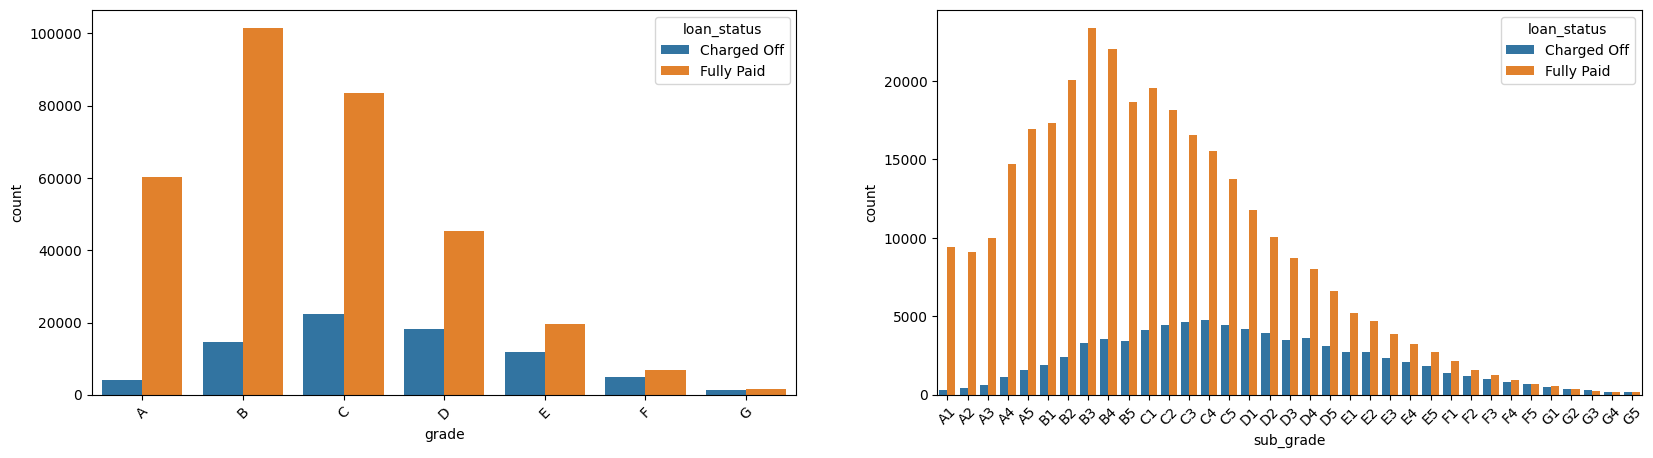

In [ ]:
plt.figure(figsize=(20,5))
x_col= ['grade', 'sub_grade']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.countplot(data=df, x= x_col[i], hue= 'loan_status')
  plt.xticks(rotation=45)

Insights
Fig.1

From Fig.1, it can be observed that the majority of loan applicants have been given the grade (Risk Rating) of 'B' followed by grades 'C', 'A' and 'D' respectively.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is highest for applicants with grade( Risk Rating) as 'A' followed by grades 'B' and 'C' respectively.
Fig.2

From Fig.2, it can be observed that the sub-grade (Risk Rating) closely follows the pattern observed for grade (Risk Rating) mentioned above. Among the sub-grades for 'B' risk rating, the applicants with risk rating 'B3' and 'B4' are the highest.

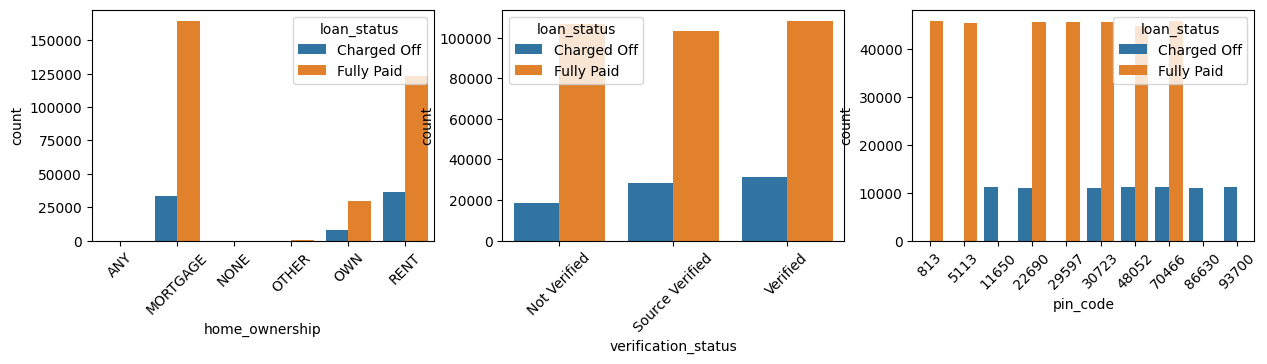

In [ ]:
plt.figure(figsize=(15,3))
x_col= ['home_ownership', 'verification_status', 'pin_code']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.countplot(data=df, x= x_col[i], hue= 'loan_status')
  plt.xticks(rotation=45)

Insights
Fig.1

From Fig.1, it can be observed that the loan applicants are higher for 'Mortgage' and 'Rent' home ownership whereas for 'Own' type of home ownership the loan applicants are considerably low.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of home ownership.

Fig.2

From Fig.2, it can be observed that there are almost equal number of applicants for all types of 'Income Verification Status'.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is slightly high for 'Not Verified' income verification status and almost equal for 'Source Verified' and 'Verified' income verification status. Overall the 'Loan Repayment' to 'Charged Off' ratio is high for all 'Income Verification Status'.
Fig.3

From Fig.3, it can be observed that there are almost equal number of applicants for all the regions except the following -> '11650' '86630' and '93700'.
It can also be observed that the applicant for regions with pincodes('11650','86630' and '93700') have not made any loan repayment.

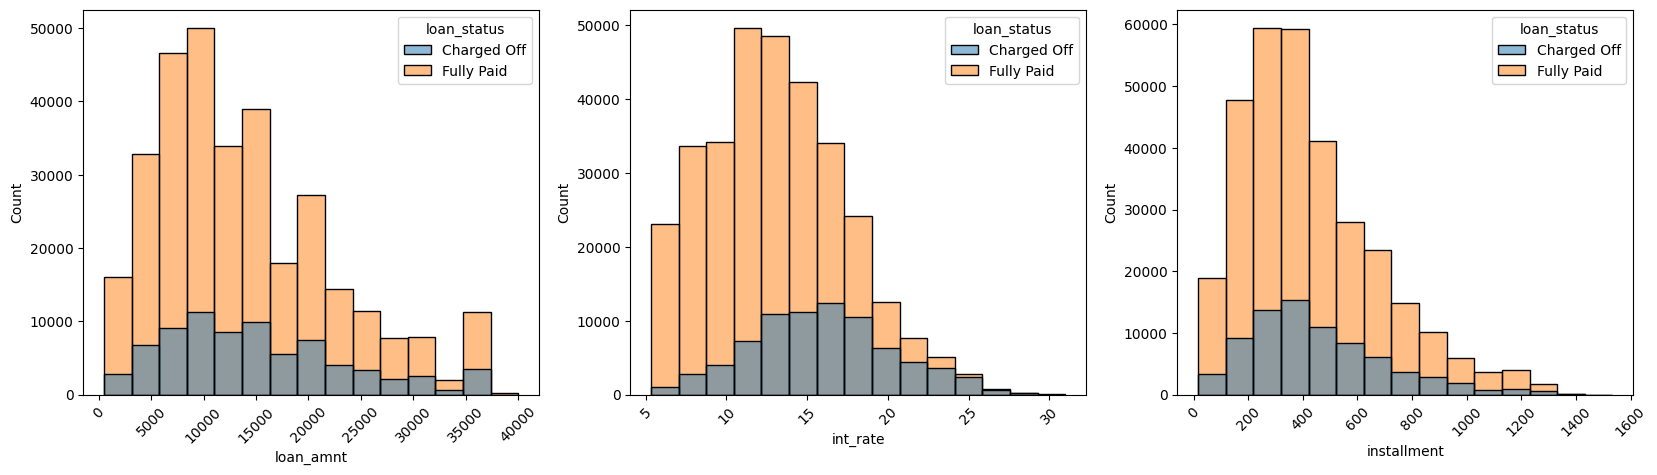

In [ ]:
plt.figure(figsize=(20,5))
x_col= ['loan_amnt', 'int_rate', 'installment']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.histplot(data=df, x= x_col[i],bins=15, hue= 'loan_status')
  plt.xticks(rotation=45)

Insights
Fig.1

From Fig.1, it can be observed that the loan applicants are overall higher for 'Loan Amount' less than 20000.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of loan amount taken.
Fig.2

From Fig.2, it can be observed that the loan applicants are overall higher for 'Interest Rate' less than 20%.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for interest rate approximately less than 17% whereas the ratio is extremely low for interest rate approximately greater than 17%

Fig.3

From Fig.3, it can be observed that the loan applicants are overall higher for installments less than 700.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of installments.

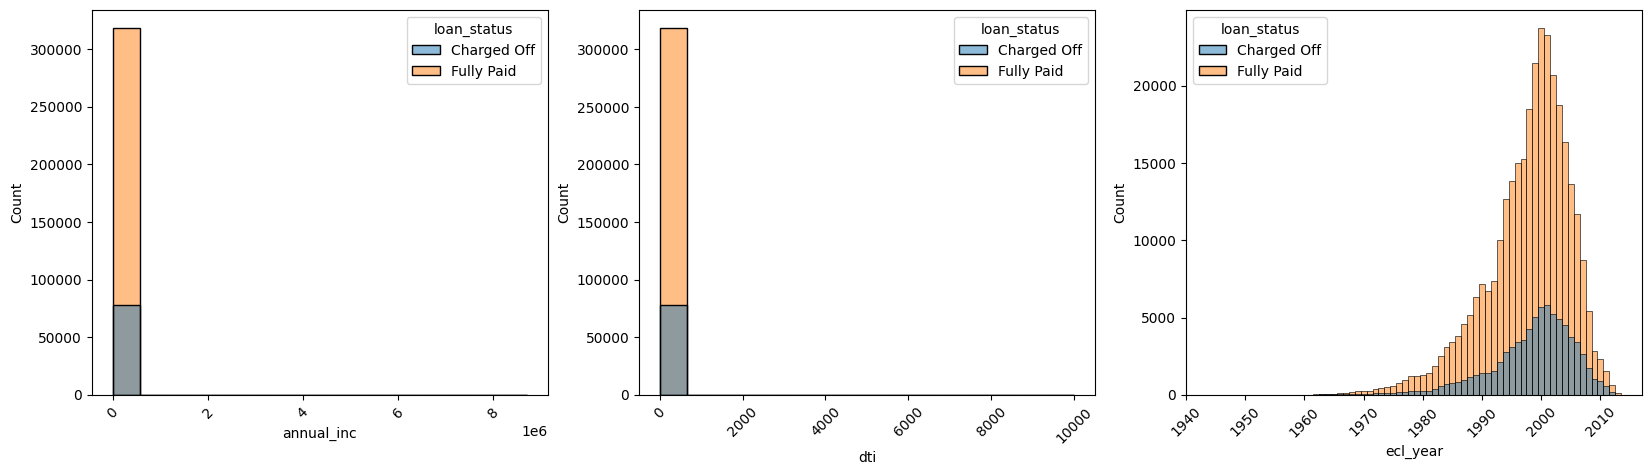

In [ ]:
plt.figure(figsize=(20,5))
x_col= ['annual_inc', 'dti', 'ecl_year']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.histplot(data=df, x= x_col[i],bins=15, hue= 'loan_status')
  plt.xticks(rotation=45)

Insights
Fig.1

From Fig.1, it can be observed that the loan applicants are overall higher for 'Annual Income' less than 1000000.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for the above mentioned range of annual income
Fig.2

From Fig.2, it can be observed that the loan applicants are overall higher for 'Debt to Income Ratio' less than 1000.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for the above mentioned range of Debt to Income Ratio.

From Fig.3, it can be observed that the 'Earliest Credit Line Year' for loan applicants is overall greater than 1975.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of Earliest Credit Line Year.

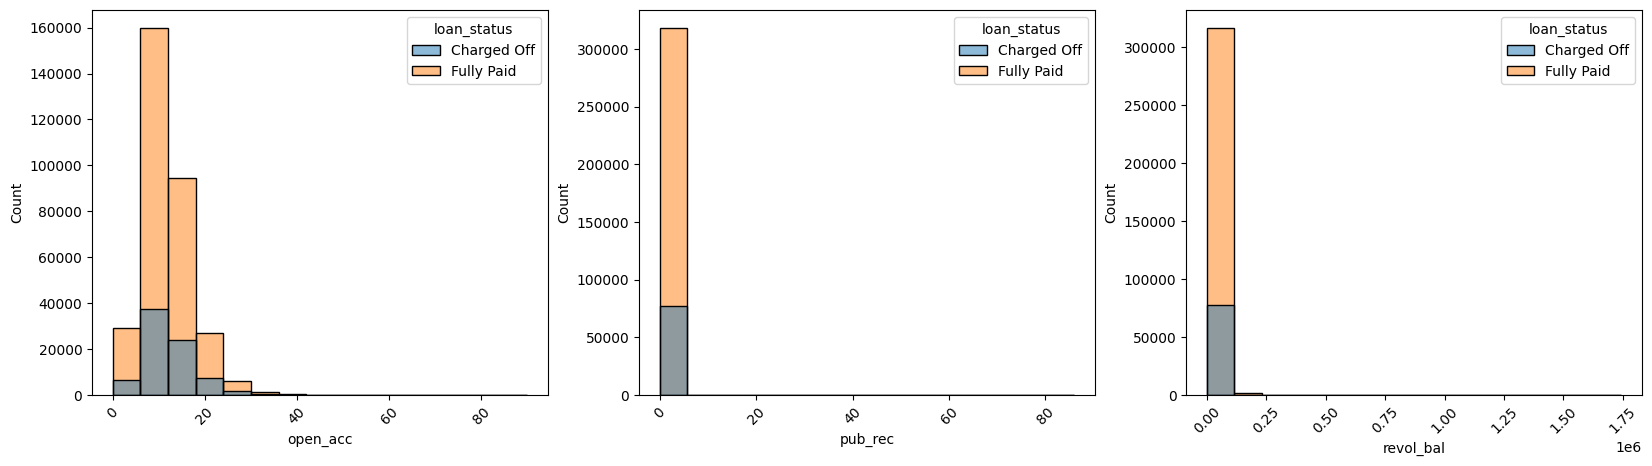

In [ ]:
plt.figure(figsize=(20,5))
x_col= ['open_acc', 'pub_rec', 'revol_bal']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.histplot(data=df, x= x_col[i],bins=15, hue= 'loan_status')
  plt.xticks(rotation=45)

Insights
Fig.1

From Fig.1, it can be observed that the 'Active Credit Lines' for loan applicants is overall less than 40.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of Active Credit Line.

Fig.2

From Fig.2, it can be observed that the loan applicants are overall higher for 'Public Credit Profile' less than 10.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for the above mentioned range of Public Credit Profile.

Fig.3

From Fig.3, it can be observed that the loan applicants are overall higher for 'Total Credit Balance' less than 25000.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for the above mentioned range of Debt to Total Credit Balance.

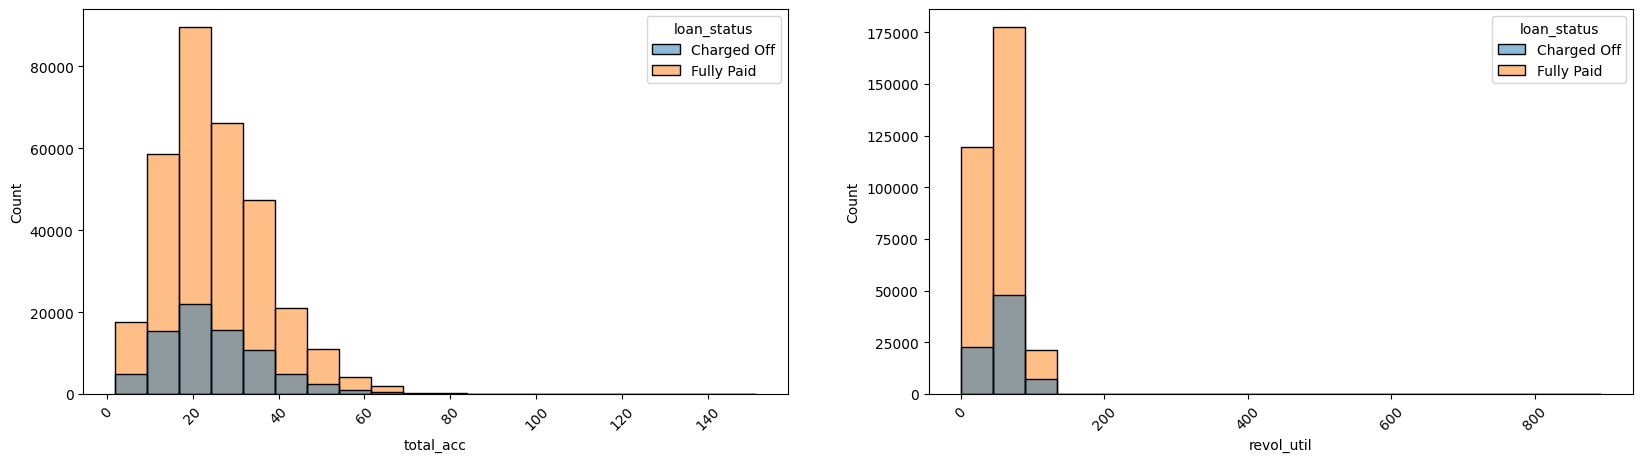

In [ ]:
plt.figure(figsize=(20,5))
x_col= ['total_acc', 'revol_util']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.histplot(data=df, x= x_col[i],bins=20, hue= 'loan_status')
  plt.xticks(rotation=45)

Insights
Fig.1

From Fig.1, it can be observed that the 'Total Credit Lines' for loan applicants is overall less than 80.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of Total Credit Lines.
Fig.2

From Fig.2, it can be observed that the 'Usage % of revolving account' is overall less than 100 for the loan applicants.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for the above mentioned range of Usage % of revolving account.

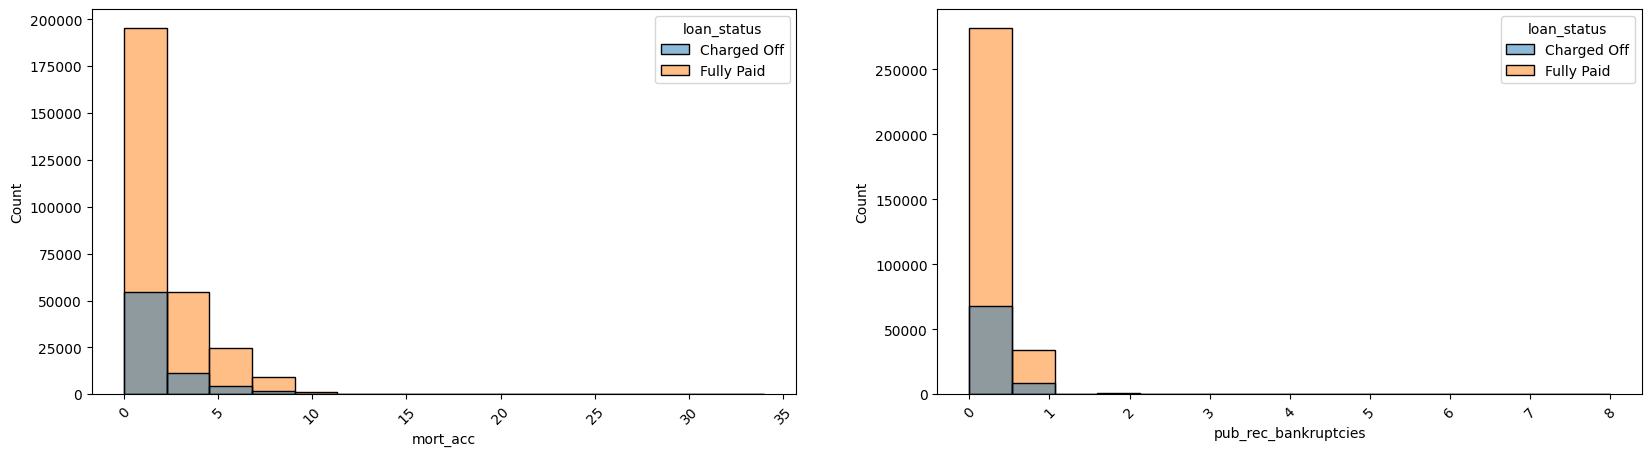

In [ ]:
plt.figure(figsize=(20,5))
x_col= ['mort_acc', 'pub_rec_bankruptcies']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.histplot(data=df, x= x_col[i],bins=15, hue= 'loan_status')
  plt.xticks(rotation=45)

Insights
Fig.1

From Fig.1, it can be observed that the 'No. of Mortgages' for loan applicants is overall less than 10.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for all types of No. of Mortgages.
Fig.2

From Fig.2, it can be observed that the 'Bankruptcy Records' is overall less than 1 for the loan applicants.
It can also be observed that the 'Loan Repayment' to 'Charged Off' ratio is high for the above mentioned range of Bankruptcy Records.

# **Bivariate Analysis**

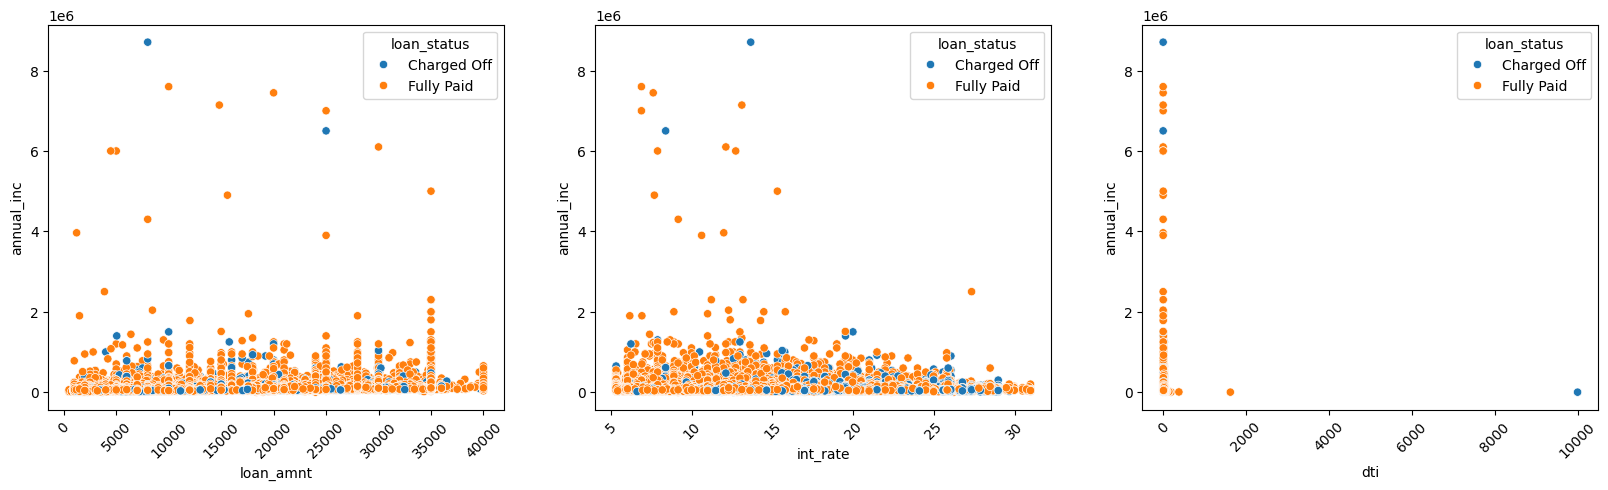

In [ ]:
plt.figure(figsize=(20,5))

x_col = ['loan_amnt', 'int_rate', 'dti']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.scatterplot(data=df, x= x_col[i],y=df['annual_inc'], hue= 'loan_status')
  plt.xticks(rotation=45)

Insights
From the above plots it can be observed that outliers are present for 'Loan Amount', 'Interest Rate' and 'Debt to Income Ratio' since there is data loosely scattered far apart in the scatter plot.

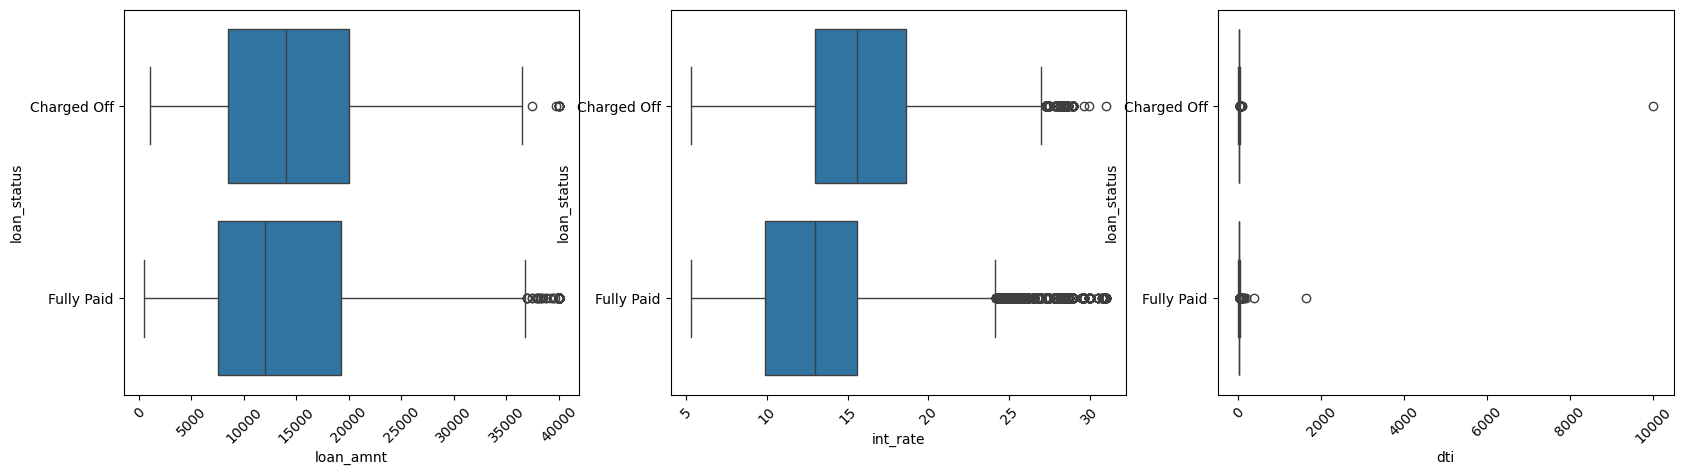

In [ ]:
plt.figure(figsize=(20,5))

x_col = ['loan_amnt', 'int_rate', 'dti']
for i in range(len(x_col)):
  plt.subplot(1,len(x_col),i+1)

  sns.boxplot(data=df, x= x_col[i],y=df['loan_status'] )
  plt.xticks(rotation=45)

From the figure it can be seen that outlier are present in Loan amount, interest rate and dti.

**2. Data Preprocessing**


In [ ]:
df.duplicated().sum()

0

So their is no duplicate value present in data set.
now we will check for null value- Categorial missing value will be replaced by Mode and numerical will be replaced by Mean value.


In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
ecl_year                    0
pin_code                    0
issue_d_year                0
dtype: int64

We can see that in emp_length 3046 values are missing
revol_util -50 missing value,
mort_acc- 6270 values are missing
pub_rec_bankruptcies 76 value afre missing

emp_length- Categorical variable so replace with Mode

mort_acc - numerical varial so replace with Mean

revol_util and pub_rec_bankruptcies are numerical but very less values are missing so we can drop these rows.


In [ ]:
df['emp_length']= df['emp_length'].fillna(df['emp_length'].mode()[0])


In [ ]:
df['mort_acc']= df['mort_acc'].fillna(df['mort_acc'].mean())

In [ ]:
df= df.dropna()

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
ecl_year                0
pin_code                0
issue_d_year            0
dtype: int64

No more null values/missing data found in the given dataset.

In [ ]:
#Encoding of target variable 'loan_staus' to convert from 'Category' to 'Integer' data type
df['loan_status']= df['loan_status'].replace('Fully Paid', 1)
df['loan_status']= df['loan_status'].replace('Charged Off', 0)
df['loan_status']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 395219, dtype: category
Categories (2, int64): [0, 1]

Loan Status sucessfully mapped as below:
Fully Paid ----> 1 (Positive Outcome)
Charged Off ---> 0 (Negative Outcome)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ecl_year,pin_code,issue_d_year
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,1990,22690,2015
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,2004,5113,2015
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,2007,5113,2015
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,2006,813,2014
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,1999,11650,2013


In [ ]:
# Extraction and Conversion of data from categorical columns
df['months'] = df['term'].str.split(' ').str[-2]
df['months'] = pd.to_numeric(df['months'])
df['emp_length'] = df['emp_length'].str.split(" ").str[-2]
df['updt_emp_length_yrs'] = df['emp_length'].replace('10+', '10')
df['updt_emp_length_yrs'] = pd.to_numeric(df['updt_emp_length_yrs'])
df = df.drop(columns= ['term', 'emp_length'])

Text(0.5, 1.0, 'Loan Amount vs Annual Income')

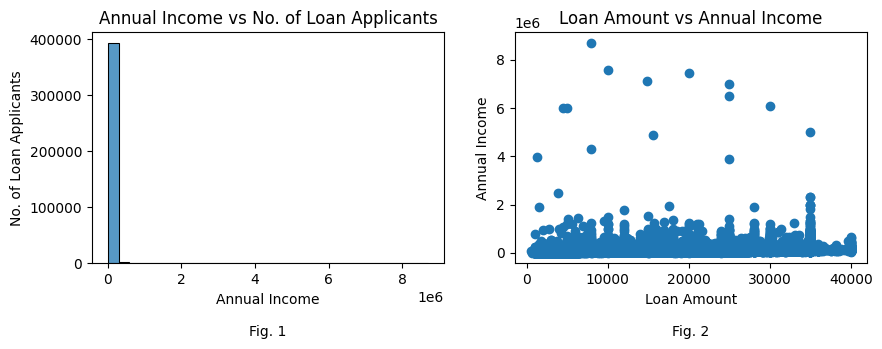

In [ ]:
# Scatter plot and Histogram of Annual Income
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='annual_inc', bins=30)
plt.xlabel(f'Annual Income\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Annual Income vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['annual_inc'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs Annual Income')

From Fig. 1 it can be observed that most applicants have income approximately less than 300000 per year while there are small number of applicants who have a very high income.

This is also shown in Fig. 2 which makes the data points densely located at the bottom and there are only few points that are loosely scattered above. These far apart loosely scattered points known as outliers should be removed from the data because it has a risk of baising results of our modelling predictions.

Outlier treatment

Scatter plot and Histogram of Annual Income after removal of outliers

Text(0.5, 1.0, 'Loan Amount vs Annual Income')

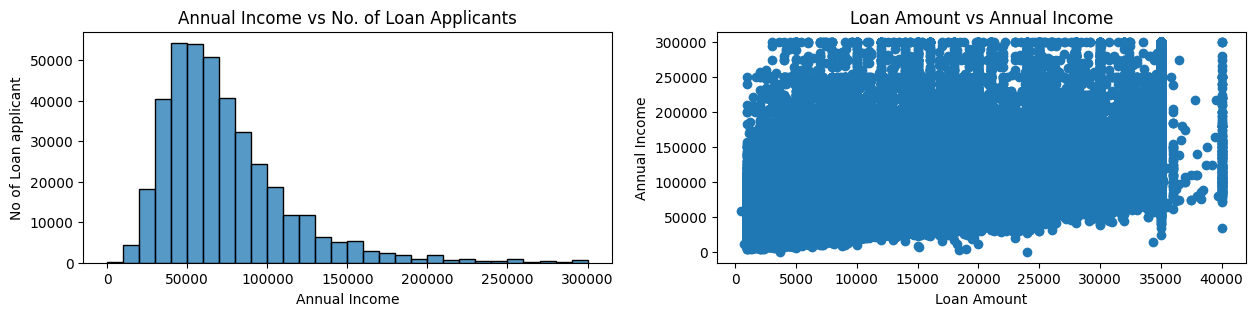

In [ ]:
plt.figure(figsize=(15,3))
df=df[df['annual_inc']<=300000]
plt.subplot(1,2,1)
sns.histplot(data=df, x= 'annual_inc', bins= 30 )
plt.xlabel('Annual Income')
plt.ylabel('No of Loan applicant')
plt.title('Annual Income vs No. of Loan Applicants')

plt.subplot(1,2,2)
plt.scatter(x = df['loan_amnt'], y = df['annual_inc'])
plt.xlabel(f'Loan Amount')
plt.ylabel('Annual Income')
plt.title('Loan Amount vs Annual Income')

Text(0.5, 1.0, 'Loan Amount vs Debt to Income Ratio')

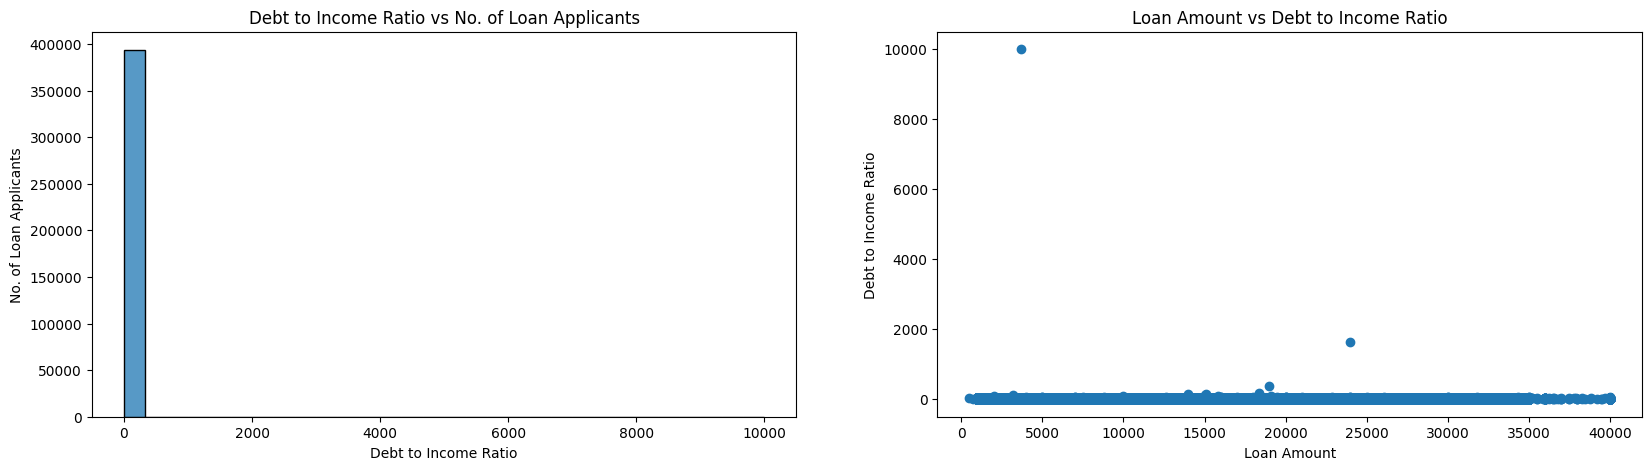

In [ ]:
# Scatter plot and Histogram of Debt to Income Ratio

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='dti', bins=30)
plt.xlabel(f'Debt to Income Ratio')
plt.ylabel('No. of Loan Applicants')
plt.title('Debt to Income Ratio vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['dti'])
plt.xlabel(f'Loan Amount')
plt.ylabel('Debt to Income Ratio')
plt.title('Loan Amount vs Debt to Income Ratio')

From Fig. 1 it can be observed that most applicants have debt to income ratio approximately less than 50 while there are small number of applicants who have a very high debt to income ratio.

This is also shown in Fig. 2 which makes the data points densely located at the bottom and there are only few points that are loosely scattered above. These far apart loosely scattered points known as outliers should be removed from the data because it has a risk of baising results of our modelling predictions.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393409 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             393409 non-null  float64 
 1   int_rate              393409 non-null  float64 
 2   installment           393409 non-null  float64 
 3   grade                 393409 non-null  category
 4   sub_grade             393409 non-null  category
 5   home_ownership        393409 non-null  category
 6   annual_inc            393409 non-null  float64 
 7   verification_status   393409 non-null  category
 8   loan_status           393409 non-null  category
 9   purpose               393409 non-null  category
 10  dti                   393409 non-null  float64 
 11  open_acc              393409 non-null  float64 
 12  pub_rec               393409 non-null  float64 
 13  revol_bal             393409 non-null  float64 
 14  revol_util            393409 non-nul

Text(0.5, 1.0, 'Loan Amount vs Public Credit Profile(-ve record)')

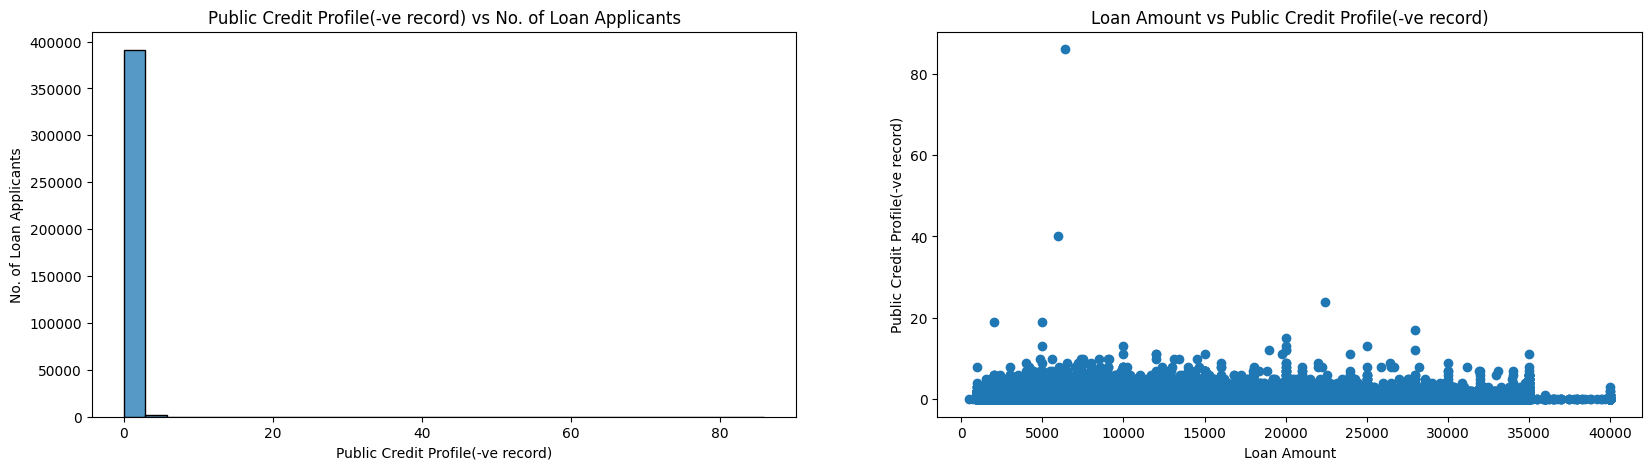

In [ ]:
# Scatter plot and Histogram of 'Public Credit Profile(-ve record)'
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='pub_rec', bins=30)
plt.xlabel(f'Public Credit Profile(-ve record)')
plt.ylabel('No. of Loan Applicants')
plt.title('Public Credit Profile(-ve record) vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['pub_rec'])
plt.xlabel(f'Loan Amount')
plt.ylabel('Public Credit Profile(-ve record)')
plt.title('Loan Amount vs Public Credit Profile(-ve record)')

From Fig. 1 it can be observed that most applicants have bankruptcy records approximately less than 6 while there are small number of applicants who have a very high number of bankruptcy records.

This is also shown in Fig. 2 which makes the data points densely located at the bottom and there are only few points that are loosely scattered above. These far apart loosely scattered points known as outliers should be removed from the data because it has a risk of baising results of our modelling predictions.

Text(0.5, 1.0, 'DPublic Credit Profile(-ve record) vs No. of Loan Applicants')

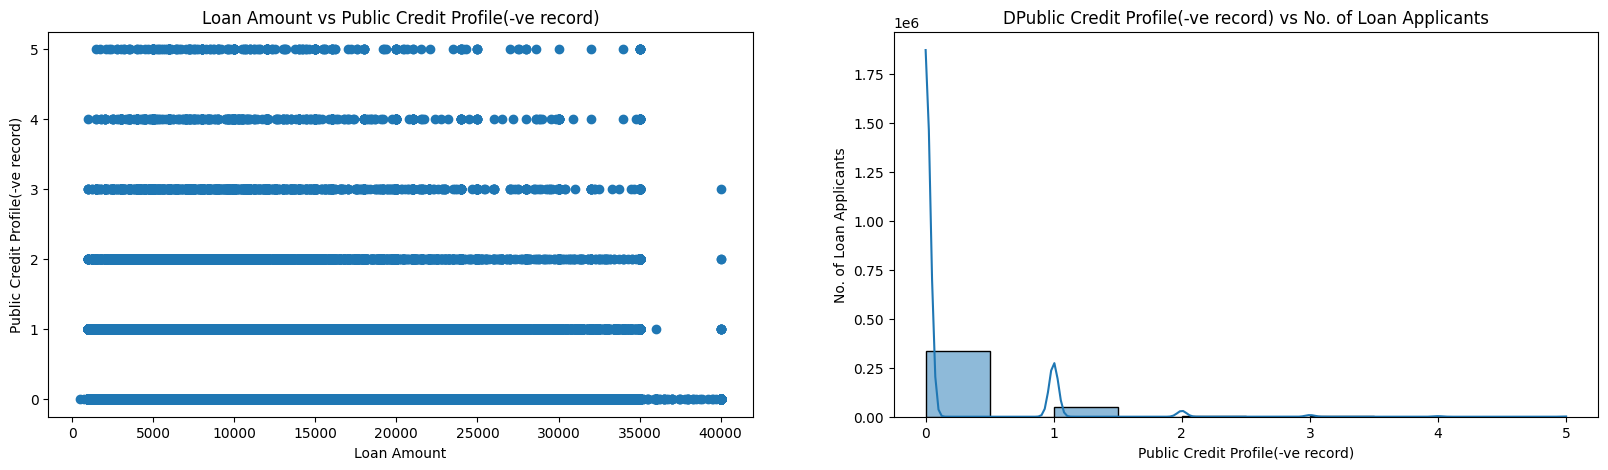

In [ ]:
# Scatter plot and Histogram of 'Public Credit Profile(-ve record)' after removal of outliers
plt.figure(figsize=(20,5))

df = df[df['pub_rec'] < 6]

plt.subplot(1, 2, 1)
plt.scatter(x = df['loan_amnt'], y = df['pub_rec'])
plt.xlabel('Loan Amount')
plt.ylabel('Public Credit Profile(-ve record)')
plt.title('Loan Amount vs Public Credit Profile(-ve record)')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='pub_rec', bins=10, kde=True)

plt.xlabel('Public Credit Profile(-ve record)')
plt.ylabel('No. of Loan Applicants')
plt.title('DPublic Credit Profile(-ve record) vs No. of Loan Applicants')

After the outliers are removed at 6 threshold the histogram and the scatter plot look like Fig. 1 and Fig. 2 above. The data is now more evenly distributed than before.

Text(0.5, 1.0, 'Loan Amount vs Total Credit Balance')

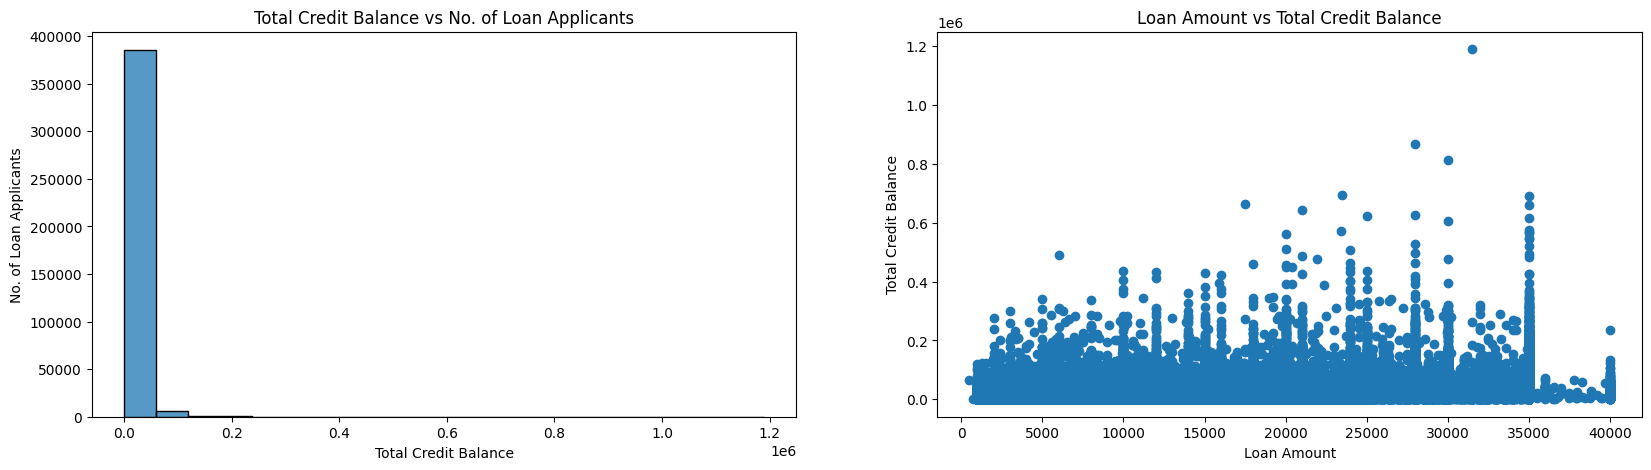

In [ ]:
# Scatter plot and Histogram of 'Total Credit Balance'
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='revol_bal', bins=20)
plt.xlabel(f'Total Credit Balance')
plt.ylabel('No. of Loan Applicants')
plt.title('Total Credit Balance vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['revol_bal'])
plt.xlabel(f'Loan Amount')
plt.ylabel('Total Credit Balance')
plt.title('Loan Amount vs Total Credit Balance')

From Fig. 1 it can be observed that most applicants have total credit balance approximately less than 200000 while there are small number of applicants who have a very high total credit balance.
This is also shown in Fig. 2 which makes the data points densely located at the bottom and there are only few points that are loosely scattered above. These far apart loosely scattered points known as outliers should be removed from the data because it has a risk of baising results of our modelling predictions.

Text(0.5, 1.0, 'Loan Amount vs Total Credit Balance')

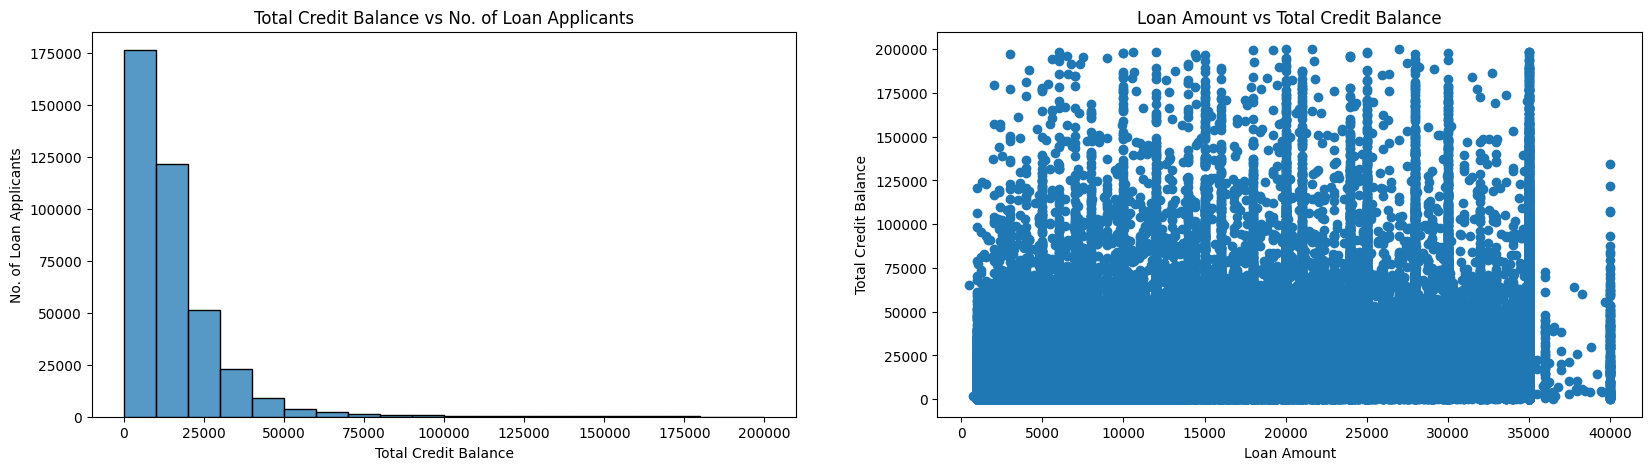

In [ ]:
#Scatter plot and Histogram of 'Total Credit Balance' after removal of outliers
plt.figure(figsize=(20,5))

df = df[df['revol_bal'] <=200000]

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='revol_bal', bins=20)
plt.xlabel(f'Total Credit Balance')
plt.ylabel('No. of Loan Applicants')
plt.title('Total Credit Balance vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['revol_bal'])
plt.xlabel(f'Loan Amount')
plt.ylabel('Total Credit Balance')
plt.title('Loan Amount vs Total Credit Balance')

From Fig. 1 it can be observed that most applicants have Usage percentage of 'revolving' accounts approximately less than 200 while there are small number of applicants who have a very high Usage percentage of 'revolving' accounts.


This is also shown in Fig. 2 which makes the data points densely located at the bottom and there are only few points that are loosely scattered above. These far apart loosely scattered points known as outliers should be removed from the data because it has a risk of baising results of our modelling predictions.

Text(0.5, 1.0, 'Loan Amount vs Usage % of revolving Accounts')

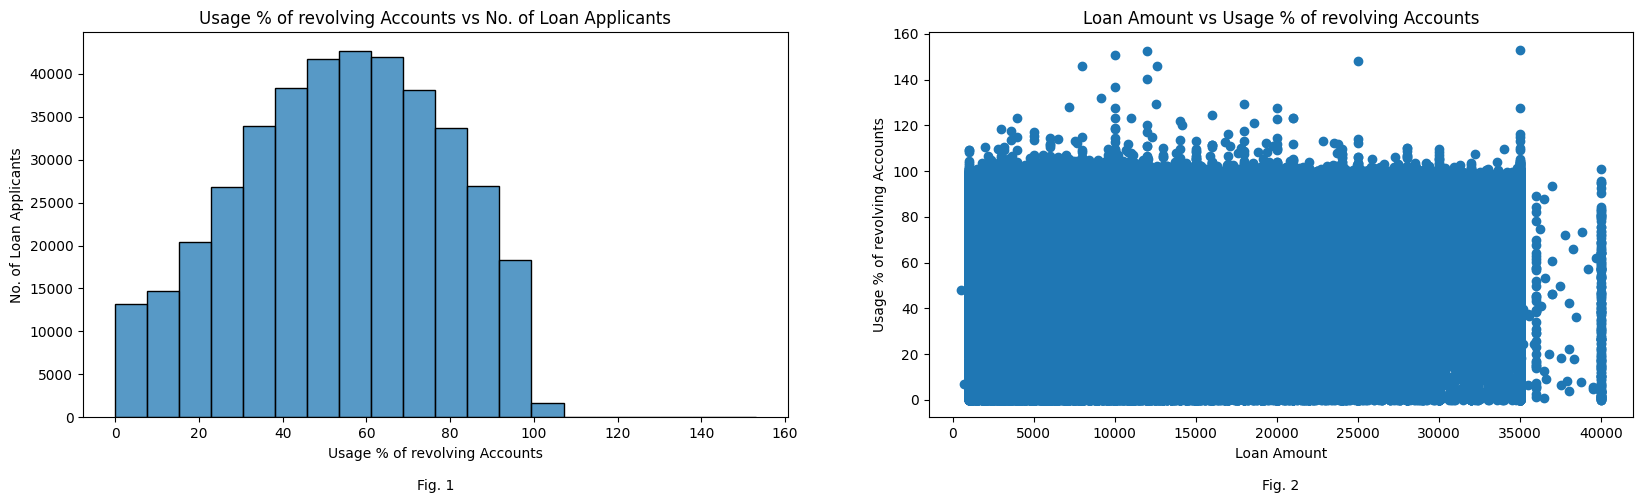

In [ ]:
# Scatter plot and Histogram of 'Usage % of revolving Accounts' after removal of outliers
plt.figure(figsize=(20,5))
df = df[df['revol_util'] <= 200]

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='revol_util', bins=20)
plt.xlabel(f'Usage % of revolving Accounts\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Usage % of revolving Accounts vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['revol_util'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Usage % of revolving Accounts')
plt.title('Loan Amount vs Usage % of revolving Accounts')

After the outliers are removed at 120 threshold the histogram and the scatter plot look like Fig. 1 and Fig. 2 above. The data is now more evenly distributed than before.

Text(0.5, 1.0, 'Loan Amount vs No. of mortgages')

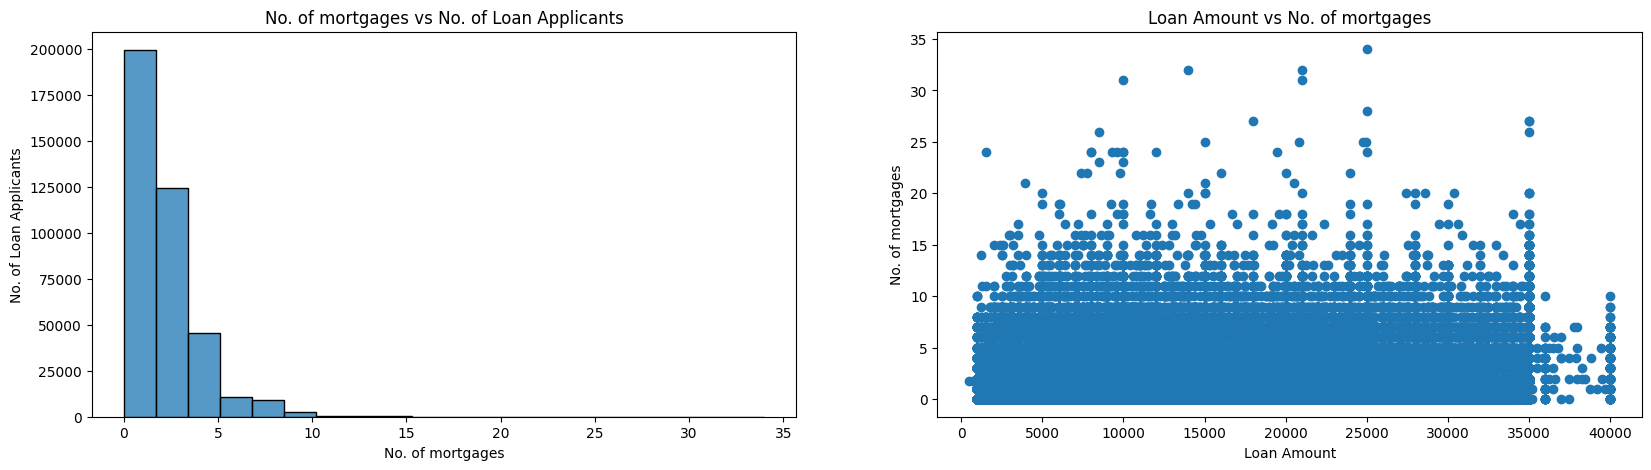

In [ ]:
# Scatter plot and Histogram of 'No. of mortgages'
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='mort_acc', bins=20)
plt.xlabel(f'No. of mortgages')
plt.ylabel('No. of Loan Applicants')
plt.title('No. of mortgages vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['mort_acc'])
plt.xlabel(f'Loan Amount')
plt.ylabel('No. of mortgages')
plt.title('Loan Amount vs No. of mortgages')

From Fig. 1 it can be observed that most applicants have number of mortgages approximately less than 12 while there are small number of applicants who have a very high number of mortgages.

This is also shown in Fig. 2 which makes the data points densely located at the bottom and there are only few points that are loosely scattered above. These far apart loosely scattered points known as outliers should be removed from the data because it has a risk of baising results of our modelling predictions.

Text(0.5, 1.0, 'Loan Amount vs No. of mortgages')

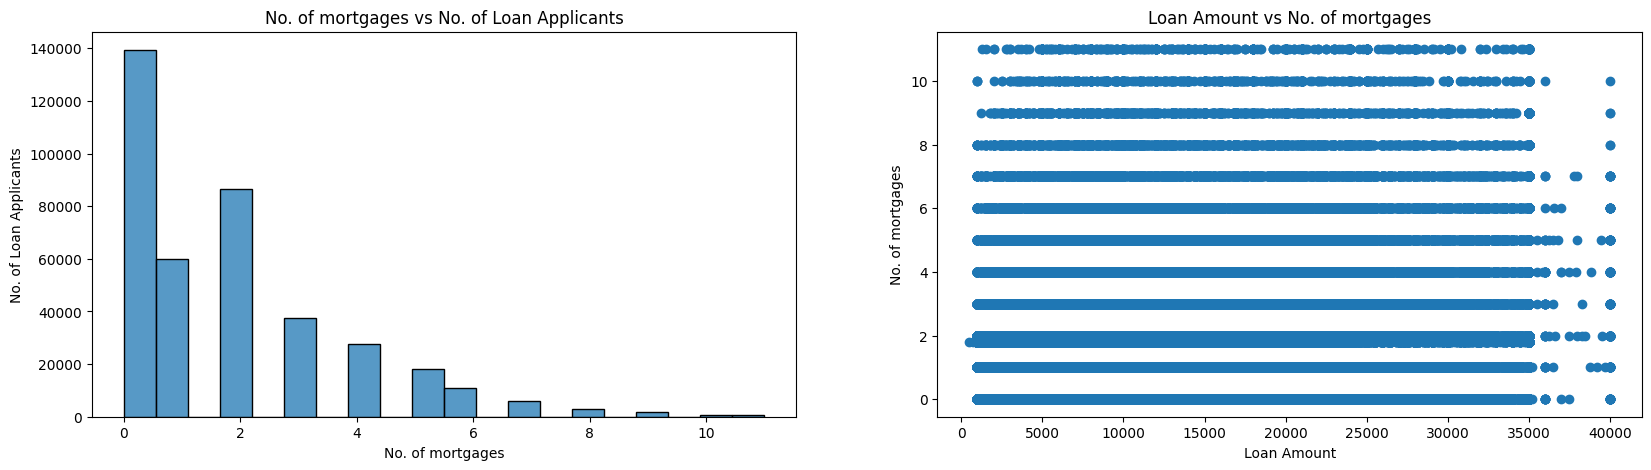

In [ ]:
# Scatter plot and Histogram of 'No. of mortgages' after removal of outliers
plt.figure(figsize=(20,5))

df = df[df['mort_acc'] < 12]

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='mort_acc', bins=20)
plt.xlabel(f'No. of mortgages')
plt.ylabel('No. of Loan Applicants')
plt.title('No. of mortgages vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['mort_acc'])
plt.xlabel(f'Loan Amount')
plt.ylabel('No. of mortgages')
plt.title('Loan Amount vs No. of mortgages')

After the outliers are removed at 12 threshold the histogram and the scatter plot look like the Fig. 1 and Fig. 2 above. The data is now more evenly distributed than before.

Text(0.5, 1.0, 'Loan Amount vs Bankruptcy Records')

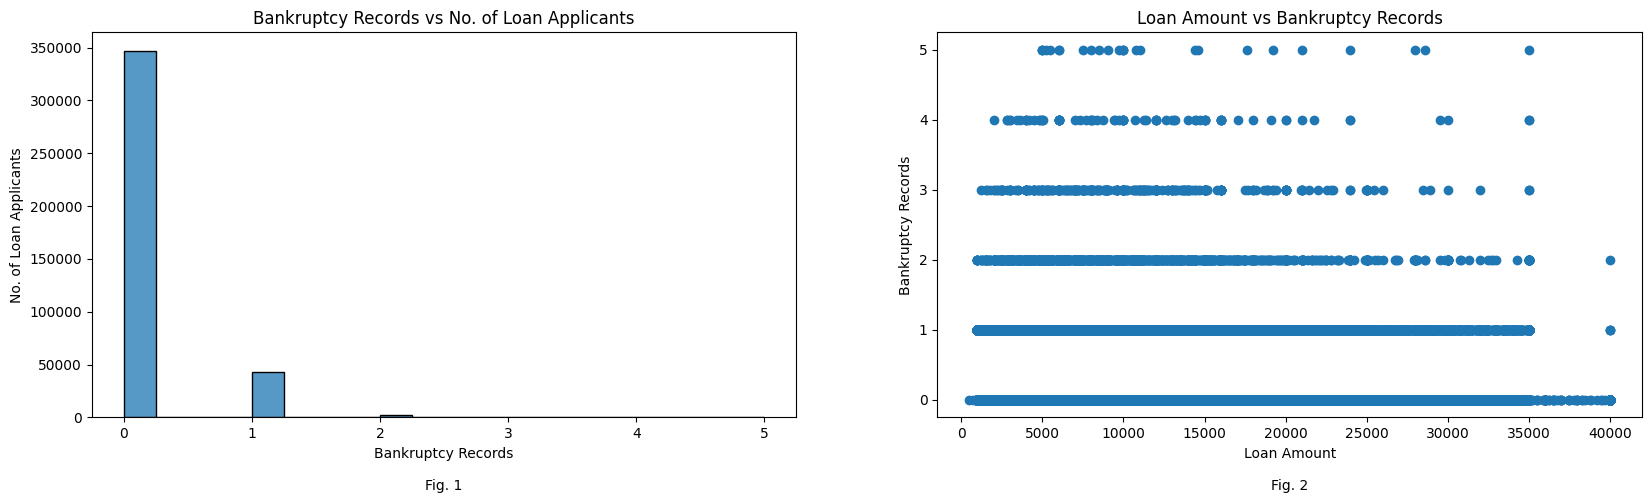

In [ ]:
# Scatter plot and Histogram of 'Bankruptcy Records'
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='pub_rec_bankruptcies', bins=20)
plt.xlabel(f'Bankruptcy Records\n\nFig. 1')
plt.ylabel('No. of Loan Applicants')
plt.title('Bankruptcy Records vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['pub_rec_bankruptcies'])
plt.xlabel(f'Loan Amount\n\nFig. 2')
plt.ylabel('Bankruptcy Records')
plt.title('Loan Amount vs Bankruptcy Records')

From Fig. 1 it can be observed that most applicants have bankruptcy records less than 4 while there are small number of applicants who have a very high bankruptcy records.

This is also shown in Fig. 2 which makes the data points densely located at the bottom and there are only few points that are loosely scattered above. These far apart loosely scattered points known as outliers should be removed from the data because it has a risk of baising results of our modelling predictions.

Text(0.5, 1.0, 'Loan Amount vs Bankruptcy Records')

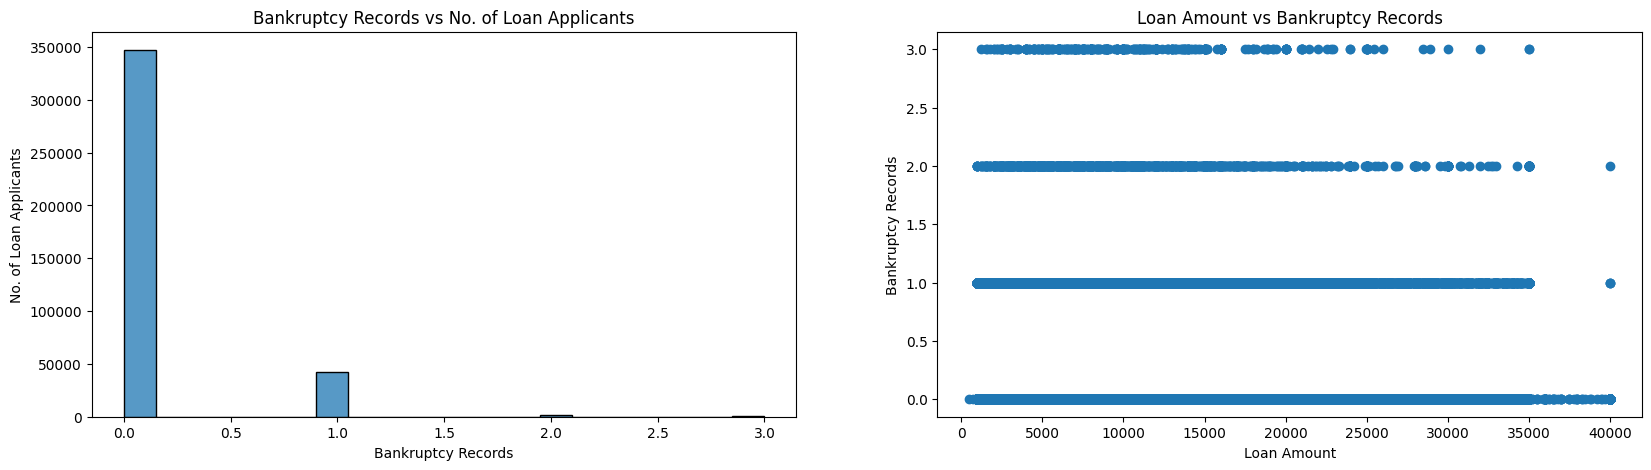

In [ ]:
# Scatter plot and Histogram of 'Bankruptcy Records' after removal of outliers
plt.figure(figsize=(20,5))

df = df[df['pub_rec_bankruptcies'] < 4]

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='pub_rec_bankruptcies', bins=20)
plt.xlabel(f'Bankruptcy Records')
plt.ylabel('No. of Loan Applicants')
plt.title('Bankruptcy Records vs No. of Loan Applicants')

plt.subplot(1, 2, 2)
plt.scatter(x = df['loan_amnt'], y = df['pub_rec_bankruptcies'])
plt.xlabel(f'Loan Amount')
plt.ylabel('Bankruptcy Records')
plt.title('Loan Amount vs Bankruptcy Records')


After the outliers are removed at 4 threshold the histogram and the scatter plot look like the Fig. 1 and Fig. 2 above. The data is now more evenly scattered than before.

In [ ]:
df.head()

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,ecl_year,pin_code,issue_d_year,months,updt_emp_length_yrs
0,10000.0,11.44,329.48,B,B4,RENT,117000.0,Not Verified,1,vacation,...,25.0,w,INDIVIDUAL,0.0,0.0,1990,22690,2015,36,10
1,8000.0,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,...,27.0,f,INDIVIDUAL,3.0,0.0,2004,5113,2015,36,4
2,15600.0,10.49,506.97,B,B3,RENT,43057.0,Source Verified,1,credit_card,...,26.0,f,INDIVIDUAL,0.0,0.0,2007,5113,2015,36,1
3,7200.0,6.49,220.65,A,A2,RENT,54000.0,Not Verified,1,credit_card,...,13.0,f,INDIVIDUAL,0.0,0.0,2006,813,2014,36,6
4,24375.0,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,0,credit_card,...,43.0,f,INDIVIDUAL,1.0,0.0,1999,11650,2013,60,9


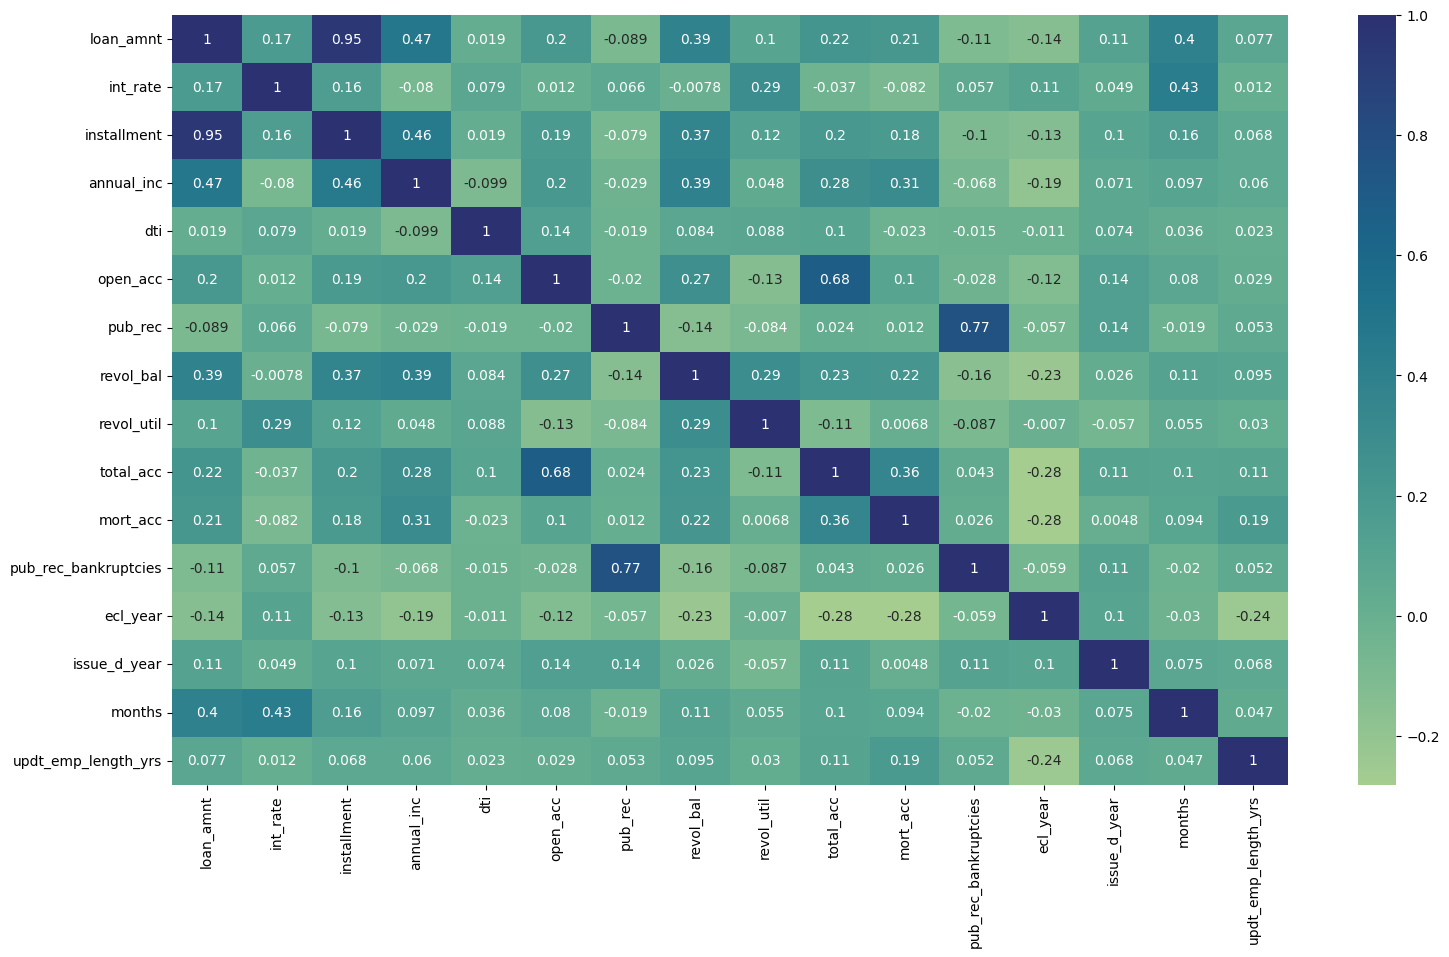

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(numeric_only=True), cmap = 'crest', annot = True)

plt.show()

In [ ]:
#Convert variables from 'Category' datatype to 'String' and 'Integer' datatype
for i in ('grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'pin_code'):
  df[i] = df[i].astype(str)
df['ecl_year'] = df['ecl_year'].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

#seperating target variable
X= df.drop(columns= 'loan_status')
y= df['loan_status']

label_encoder= LabelEncoder()
for i in ('grade', 'sub_grade','home_ownership', 'purpose','verification_status', 'initial_list_status', 'application_type', 'pin_code'):

  X[i]=label_encoder.fit_transform(X[i])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 43)

In [ ]:
print(f'Training Data:\n\n{y_train.value_counts()}\n\n Validation Data: \n\n{y_val.value_counts()}\n\n Test Data:\n\n{y_test.value_counts()}')

Training Data:

1    220411
0     53869
Name: loan_status, dtype: int64

 Validation Data: 

1    47282
0    11492
Name: loan_status, dtype: int64

 Test Data:

1    47107
0    11668
Name: loan_status, dtype: int64


In [ ]:
print(f'Training data: {X_train.shape}{y_train.shape}\n\n')
print(f'Testing data: {X_test.shape}{y_test.shape}\n\n')
print(f'Validation data: {X_val.shape}{y_val.shape}\n\n')

Training data: (274280, 24)(274280,)


Testing data: (58775, 24)(58775,)


Validation data: (58774, 24)(58774,)




It can be observed from the above value counts that the data is imbalanced for outcomes '1' and '0'.
SMOTE technique is one of the techniques that can be used to balance the data by oversampling the records. SMOTE uses the nearest neighbour concept to oversample data.
The oversampling will be done for training data only since the model should be making predictions on the real world data, the imbalance in validation and testing data will remain as is.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score


# Create an instance of SMOTE
smt= SMOTE()

# Perform SMOTE on the training data
print('Before SMOTE')
print(y_train.value_counts())

X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
print('After SMOTE')
print(y_train_smote.value_counts())

Before SMOTE
1    220411
0     53869
Name: loan_status, dtype: int64
After SMOTE
0    220411
1    220411
Name: loan_status, dtype: int64


Check the collinearity among variables

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_smote.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_smote.values, i) for i in range(X_train_smote.shape[1])]

# Display the VIF values
print(vif_data)

                Variable            VIF
0              loan_amnt     250.052718
1               int_rate     273.281657
2            installment     220.736671
3                  grade      44.232484
4              sub_grade     163.678650
5         home_ownership       4.859568
6             annual_inc       6.917873
7    verification_status       2.959248
8                purpose       2.633603
9                    dti       1.644942
10              open_acc      14.049882
11               pub_rec       2.812904
12             revol_bal       3.209330
13            revol_util       9.161701
14             total_acc      14.491745
15   initial_list_status       1.551791
16      application_type     474.998240
17              mort_acc       2.940449
18  pub_rec_bankruptcies       2.763028
19              ecl_year  108875.062412
20              pin_code       3.860383
21          issue_d_year  110025.608586
22                months     128.755420
23   updt_emp_length_yrs       4.712403


For the VIF values observed above, it can be inferred that there are multiple columns for which collinearity exists (i.e. High VIF). Collinearity needs to be removed to ensure the stability and interpretability of the model.

In [ ]:
X_trainu = X_train_smote.drop(columns= ['installment' , 'sub_grade', 'total_acc', 'application_type', 'issue_d_year', 'int_rate', 'ecl_year', 'months'])

Removed columns with high VIF (i.e. VIF>10) to eliminate collinearity between variables.

In [ ]:
# Re-Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_trainu.columns
vif_data["VIF"] = [variance_inflation_factor(X_trainu.values, i) for i in range(X_trainu.shape[1])]

# Display the VIF values
print(vif_data)

                Variable       VIF
0              loan_amnt  6.614356
1                  grade  4.238668
2         home_ownership  3.692696
3             annual_inc  6.585332
4    verification_status  2.938476
5                purpose  2.369135
6                    dti  1.630041
7               open_acc  6.200603
8                pub_rec  2.793874
9              revol_bal  3.009084
10            revol_util  6.776718
11   initial_list_status  1.462498
12              mort_acc  2.491481
13  pub_rec_bankruptcies  2.740171
14              pin_code  3.555983
15   updt_emp_length_yrs  4.112156


After removing the collinear columns the VIF for remaining columns is within the limit which indicates tolerable collinearity among the remaining variables.

In [ ]:
# Remove the collinear columns from validation and testing data
X_valu = X_val.drop(columns= ['installment' , 'sub_grade', 'total_acc', 'application_type', 'issue_d_year', 'int_rate', 'ecl_year', 'months'])
X_testu = X_test.drop(columns= ['installment' , 'sub_grade', 'total_acc', 'application_type', 'issue_d_year', 'int_rate', 'ecl_year', 'months'])

Standardizing the dat improves the performance and interpretability of the model, and ensures that the algorithm is not influenced by the scale of the input variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_trainu= scaler.fit_transform(X_trainu)
X_valu= scaler.fit_transform(X_valu)
X_testu= scaler.fit_transform(X_testu)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model= LogisticRegression()
model.fit(X_trainu, y_train_smote)

LogisticRegression()

Accuracy: 0.5678020893592405

 Confusion Matrix: [[ 7573  3919]
 [21483 25799]]
Classification Report


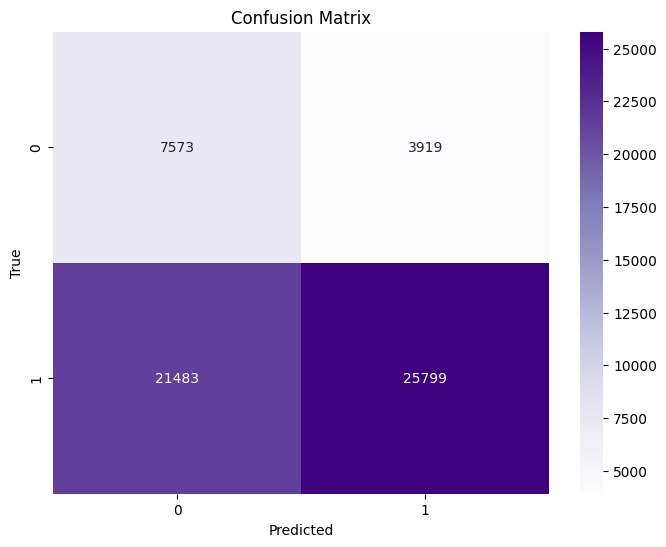

In [ ]:
from sklearn.metrics import f1_score
yval_pred= model.predict(X_valu)

accuracy= accuracy_score(y_val, yval_pred)
conf_matrix= confusion_matrix(y_val, yval_pred)
class_repo= classification_report(y_val, yval_pred)

print(f'Accuracy: {accuracy}\n\n Confusion Matrix: {conf_matrix}')
print('Classification Report')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_val, yval_pred))

              precision    recall  f1-score   support

           0       0.26      0.66      0.37     11492
           1       0.87      0.55      0.67     47282

    accuracy                           0.57     58774
   macro avg       0.56      0.60      0.52     58774
weighted avg       0.75      0.57      0.61     58774



Insights
Accuracy: 0.5673 (~57%):

The overall accuracy of the model is approximately 57%, indicating the proportion of correctly classified instances among the total instances.

Precision:

Precision is the ratio of true positive predictions to the total predicted positives.
Precision for class 0 (precision_0): 0.26 (35%)
Precision for class 1 (precision_1): 0.87 (87%)
Precision is high for class 1, indicating that when the model predicts class 1, it is correct about 87% of the time. However, precision is lower for class 0, suggesting that when the model predicts class 0, it is correct about 26% of the time.

Recall:

Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives.
Recall for class 0 (recall_0): 0.65 (65%)
Recall for class 1 (recall_1): 0.55 (55%)
The model has a higher recall for class 0, indicating that it effectively identifies about 65% of the actual instances of class 0. However, the recall is lower for class 1, suggesting that it identifies about 55% of the actual instances of class 1.

F1-Score:

F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
F1-score for class 0 (f1-score_0): 0.37
F1-score for class 1 (f1-score_1): 0.67
The F1-scores reflect a trade-off between precision and recall. Class 1 has a higher F1-score, indicating a better balance between precision and recall for class 1 compared to class 0.
Support:

Support represents the number of actual occurrences of each class in the specified dataset.
Support for class 0: 11492 instances
Support for class 1: 47282 instances

In [ ]:
from sklearn.metrics import roc_curve, auc


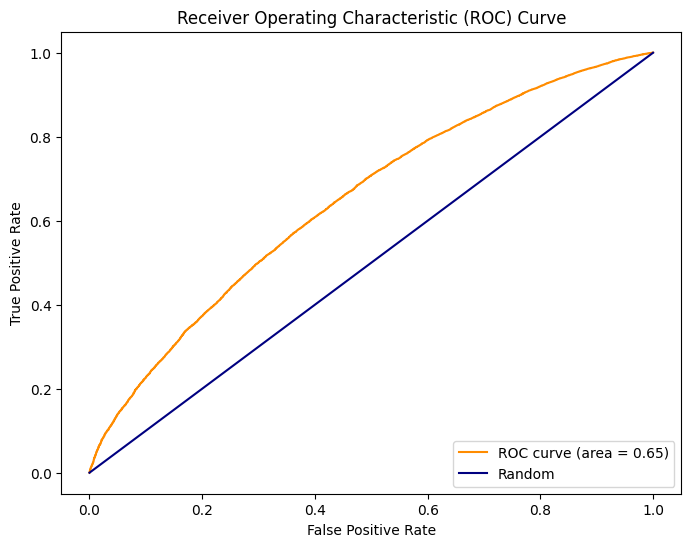

In [ ]:
y_prob = model.predict_proba(X_valu)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Insights
An AU-ROC value of 0.65 suggests that, on average, the model has a good ability to distinguish between the positive and negative classes, but there is room for improvement.

Accuracy: 0.5688643130582731

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.66      0.38     11668
           1       0.87      0.55      0.67     47107

    accuracy                           0.57     58775
   macro avg       0.57      0.60      0.52     58775
weighted avg       0.75      0.57      0.61     58775


Confusion Matrix:


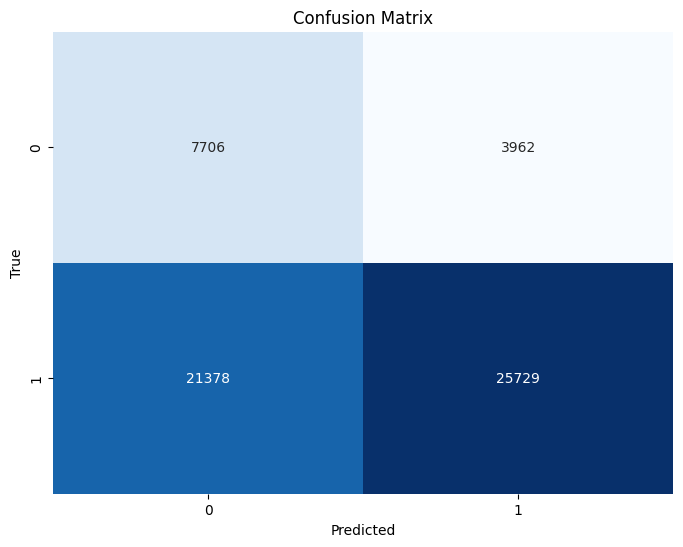

In [ ]:
y_pred = model.predict(X_testu)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)

print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Insights¶
Accuracy: 0.57 (~57%):

The overall accuracy of the model is approximately 71%, indicating the proportion of correctly classified instances among the total instances.
Precision:

Precision is the ratio of true positive predictions to the total predicted positives.
Precision for class 0 (precision_0): 0.26 (26%)
Precision for class 1 (precision_1): 0.86 (86%)
Precision is high for class 1, indicating that when the model predicts class 1, it is correct about 86% of the time. However, precision is lower for class 0, suggesting that when the model predicts class 0, it is correct about 26% of the time.

Recall:

Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives.
Recall for class 0 (recall_0): 0.65 (65%)
Recall for class 1 (recall_1): 0.55 (55%)
The model has a equal recall for class 0, indicating that it effectively identifies about 55% of the actual instances of class 0 and class 1.
F1-Score:

F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
F1-score for class 0 (f1-score_0): 0.37
F1-score for class 1 (f1-score_1): 0.67
The F1-scores reflect a trade-off between precision and recall. Class 1 has a higher F1-score, indicating a better balance between precision and recall for class 1 compared to class 0.

Support:

Support represents the number of actual occurrences of each class in the specified dataset.
Support for class 0: 11668 instances
Support for class 1: 47107 instances
Overall Insights:

The model's performance increased on using the impute method for missing value treatment.

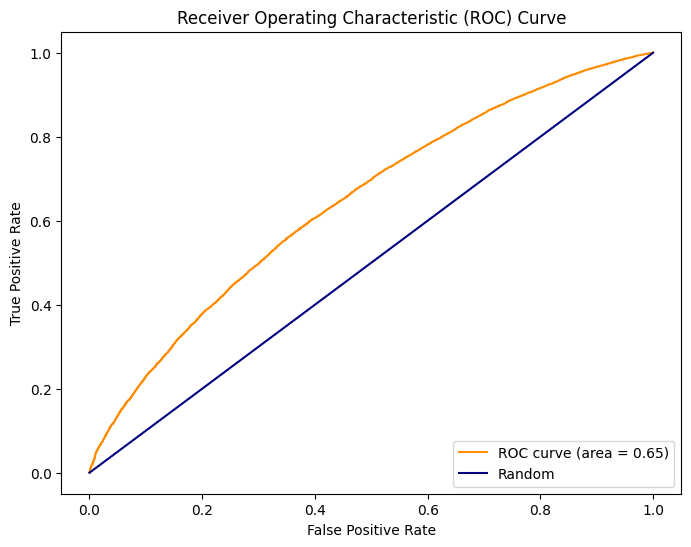

In [ ]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_testu)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Insights
An AU-ROC value of 0.65 suggests that, on average, the model dont have a good ability to distinguish between the positive and negative classes, but there is room for improvement.

In [ ]:
# Verify best model by searching best hyperparameters to enhance model's performance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model = LogisticRegression(penalty='l2', solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the grid search to the data
grid_search.fit(X_trainu, y_train_smote)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_valu)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1'}
Test Accuracy: 0.6263143566883316


Insights
From the values mentioned above it can be observed that the model is performing as expected and no further hypertuning can improve the preformance.

# **Insights**

- From the values mentioned above it can be observed that the model is performing as expected and no further hypertuning can improve the preformance.
- The low precision value for class 0 can be due to the imbalance of data for the same, if more real time data for class 0 can be provided, the model can be trained better and the performance might increase.
- Also since the data consists of a lot of categorical columns a different ML model might prove better in predicting the outcome than Logistic Regression.
- The model's precision value of 0.87 signifies that it accurately predicts the likelihood of loan repayment in 87% of cases.
- The model's precision value of 0.26 for charged-off loans indicates that, among the instances predicted as charged off, only 38% were correctly classified, emphasizing a lower accuracy in predicting this specific class.
- The model's sensitivity value of 0.69 for loan repayment signifies that it accurately identifies 71% of the instances where loans are repaid, demonstrating its ability to effectively capture a significant portion of the actual loan repayment cases.
- The model's sensitivity value of 0.69 for charged-off loans signifies that it correctly identifies 71% of the actual charged-off instances, reflecting its ability to capture a substantial portion of the relevant cases for this class.
- The features that heavily affected the models outcome are
grade - LoanTap assigned loan grade (Risk ratings by LoanTap)
pub_rec - Negative records on borrower's public credit profile.
- From the analysis performed it can also be observed that the applicants for regions with pincodes('11650'm '86630' and '93700') have not made any loan repayment. It can be inferred that either
- The data is missing w.r.t. loan repayment for these regions or
- The applicants from regions with pincodes('11650'm '86630' and '93700') are - - highly unlikely to repay the loan granted by LoanTap.
LoanTap should carefully review the applicants belonging to above regions.

# **Recommendation **

- The data is missing w.r.t. loan repayment for these regions or
The applicants from regions with pincodes('11650'm '86630' and '93700') are highly unlikely to repay the loan granted by LoanTap.
LoanTap should carefully review the applicants belonging to above regions.
- The features that heavily affected the models outcome are grade - LoanTap assigned loan grade (Risk ratings by LoanTap) pub_rec - Negative records on borrower's public credit profile. So it should be avoided to give loan to the high risk person.
- By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.